### Create dataset from the cityscape files

In [1]:
import numpy as np
%run cityscape_dataset_maker.ipynb

cityscape has three sections :

val - 500 images

test - 1525 images

train - 2975 images

In [2]:
get_images('M:/Documents/GitHub/Projet-object-detection-2A/datasets/cityscape/leftImg8bit_trainvaltest/leftImg8bit/train','M:/Documents/GitHub/Projet-object-detection-2A/datasets/cityscape/gtFine_trainvaltest/gtFine/train')

In [3]:
cars_array, pedestrians_array, others_array, others_labels_array = dataset_maker()

In [5]:
img_size = 96

cars_array = resize_images(cars_array, (img_size,img_size))
pedestrians_array = resize_images(pedestrians_array, (img_size,img_size))
others_array = resize_images(others_array, (img_size,img_size))

error  1727
error  1728
error  1762
error  1775
error  1791
error  1805
error  1821
error  1832
error  1838
error  1866
error  1885
error  1897
error  1930
error  1962
error  1982
error  2002
error  2009
error  2043
error  2065
error  2181
error  2188
error  2196
error  2212
error  2230
error  2234
error  2245
error  2255
error  2258
error  2261
error  2276
error  2284
error  2299
error  2302
error  2310
error  6667
error  6668
error  6677
error  6694
error  6787
error  6790
error  6820
error  6841
error  6877
error  6880
error  6904
error  6926
error  6941
error  6949
error  6961
error  6972
error  6979
error  6992
error  7001
error  7036
error  7079
error  7105
error  7117
error  7121
error  7125
error  7132
error  7141
error  7148
error  7153
error  7157
error  7163
error  7171
error  7201
error  7214
error  7221
error  7243
error  7244
error  7254
error  7275
error  7322
error  7325
error  7338
error  7339
error  7362
error  7365
error  7370
error  7666
error  7678
error  7683
erro

(8414, 96, 96, 3)


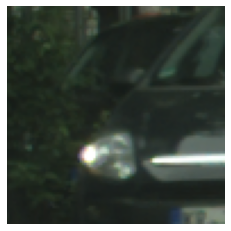

In [6]:
print(cars_array.shape)
plt.axis("off")
plt.imshow(cars_array[np.random.randint(0,cars_array.shape[0])])

(1779, 96, 96, 3)


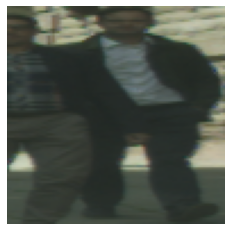

In [7]:
print(pedestrians_array.shape)
plt.axis("off")
plt.imshow(pedestrians_array[np.random.randint(0,pedestrians_array.shape[0])])

(30295, 96, 96, 3)
pole


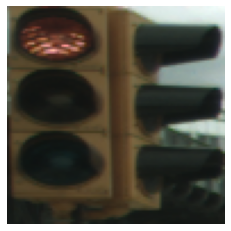

In [8]:
print(others_array.shape)
plt.axis("off")
random_index = np.random.randint(0,others_array.shape[0])
print(others_labels_array[random_index])
plt.imshow(others_array[random_index])

In [9]:
#arrays of images to training set
X_train = np.concatenate((cars_array, pedestrians_array, others_array), axis=0)
y_train = np.concatenate((np.zeros(cars_array.shape[0]), np.ones(pedestrians_array.shape[0]), np.full(others_array.shape[0],2)), axis=0)

In [10]:
from tensorflow.keras.utils import to_categorical
# to one-hot encoding
y_train = to_categorical(y_train, num_classes=3)

In [11]:
#shuffle the data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0)

In [12]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

### Convolutive Neural Networks

In [13]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [14]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3476327328818798207
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6945177600
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4744003065969049082
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1070 Ti, pci bus id: 0000:1c:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [15]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU

In [16]:
num_classes = 3

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same', input_shape=(img_size,img_size,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [18]:
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 96, 96, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                    

In [20]:
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val))

Epoch 1/10
1139/1139 [==============================] - 24s 13ms/step - loss: 2.5138 - accuracy: 0.8692 - val_loss: 0.2343 - val_accuracy: 0.9336
Epoch 2/10
1139/1139 [==============================] - 15s 13ms/step - loss: 0.2586 - accuracy: 0.9242 - val_loss: 0.2231 - val_accuracy: 0.9336
Epoch 3/10
1139/1139 [==============================] - 15s 13ms/step - loss: 0.1897 - accuracy: 0.9397 - val_loss: 0.1770 - val_accuracy: 0.9481
Epoch 4/10
1139/1139 [==============================] - 15s 13ms/step - loss: 0.1624 - accuracy: 0.9487 - val_loss: 0.1744 - val_accuracy: 0.9504
Epoch 5/10
1139/1139 [==============================] - 15s 13ms/step - loss: 0.1724 - accuracy: 0.9454 - val_loss: 0.1996 - val_accuracy: 0.9390
Epoch 6/10
1139/1139 [==============================] - 15s 13ms/step - loss: 0.1661 - accuracy: 0.9481 - val_loss: 0.1973 - val_accuracy: 0.9474
Epoch 7/10
1139/1139 [==============================] - 15s 13ms/step - loss: 0.1594 - accuracy: 0.9487 - val_loss: 0.2455 -

In [21]:
model.save('../model/model_id_cityscape.h5')

## Testing

Text(0.5, 0, 'epoch')

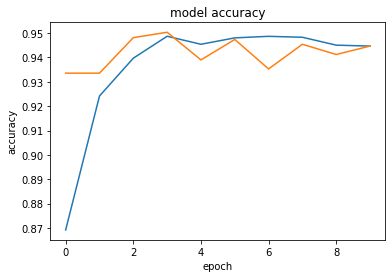

In [22]:
#graph accuracy vs val_accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [23]:
target_names = ['cars', 'pedestrians', 'others']

In [24]:
from sklearn.metrics import classification_report
predictions = model.predict(X_val)
predictions = np.argmax(predictions, axis=1)
y_val = np.argmax(y_val, axis=1)
print(classification_report(y_val, predictions, target_names=target_names))

              precision    recall  f1-score   support

        cars       0.96      0.85      0.90       817
 pedestrians       0.72      0.84      0.78       171
      others       0.96      0.98      0.97      3061

    accuracy                           0.94      4049
   macro avg       0.88      0.89      0.88      4049
weighted avg       0.95      0.94      0.94      4049

